# Resistance vs. load
Generally, the conditions of a system are characterized by its random properties $X_1, X_2, \dots, X_n$. These conditions are summarized by so called _limit state function_ $g(X_1, X_2, \dots, X_n)$. This function $g()$ - also called the _performance function_ -  is itself deterministic. Only because its arguments $X_1, X_2, \dots, X_n$ are random variables, the function value is also random variable.

Failure of the system is indicated by the limit state function $g()$ being negative or zero

$$
g(X_1, X_2, \dots, X_n) \le0
$$

When assessing reliability of a structure, the system properites are sometimes reduced to just two:

- _load effect_ $E$
- _structural resistance_ $R$

The failure occurs when the load effect is greater than or equal to the structural resistance. This is equivalent to

$$
g(R, E) = R - E \le 0
$$

For example, we may think of $E$ as the bending moment at the most exposed cross section on beam. For simply supported beam $M_{max} = \frac{fl^2}{8}$. This depends on random load $f$ and length $l$.

You may think of $R$ as the maximum elastic bending moment $M_{el}=f_{yd} W_y$. This depends on material design strength $f_{yd}$ and resistance moment $W_y$ ("průřezový modul"). 

Probability of failure is therefore the probability of resistance being less or equal to load effect

$$
P_f = \Pr(g(R,E)\le0) = \Pr(R - E \le 0)
$$

Assume that $R$ and $E$ has the joint probability density function $f_{RE}(r,e)$. Probability of the structure failing is then expressed as

$$
P_f = \iint_{g(r,e)\le0}f_{RE}(r,e)\,de\,dr = \iint_{r-e\le0}f_{RE}(r,e)\,de\,dr
$$

Although it may not be entirely correct for every structure, we often assume that the resistance and the load effect are _independent_ random variables. Then the joint PDF can be factored as product of individual PDFs

$$
f_{RE}(r,e) = f_R(r)f_E(e)
$$

Probability of failure is now expressed

$$
P_f = \iint_{r-e\le0}f_R(r)f_E(e)\,de\,dr
$$

Taking the outer integral over the domain of $E$, i.e. from $-\infty$ to $\infty$, and the inner integral over the values of $r$ that satisfy $r-e\le0$, i.e. $r\le e$ we obtain

$$
P_f = \int_{-\infty}^{\infty}\int_{-\infty}^{e}f_R(r)f_E(e)\,dr\,de
$$

Since $f_E(e)$ does not depend on $r$ it can be factored in front of the inner integral

$$
P_f = \int_{-\infty}^{\infty}f_E(e)\int_{-\infty}^{e}f_R(r)\,dr\,de
$$

Considering the definition of cumulative distribution function in form

$$
F_X(x) = \int_{-\infty}^x f_X(t)\,dt
$$

the expression rewrites to

$$
\boxed{P_f = \int_{-\infty}^{\infty}f_E(e)F_R(e)\,de}
$$

## Example 1: Uniformly distributed load effect and resistance
In this example we assume that we know the distribution of the load effect $E$ and the resistance $R$. We want to calculate the probability of failure.

Both, the load effect and resistance are uniformly distributed with known lower and upper ranges
$$
E \sim \mathcal{U}(e_l = 1, e_u = 3) \\
R \sim \mathcal{U}(r_l = 2, r_u = 8)
$$

The PDF of effect is
\begin{align}
  f_E(e) &= \begin{cases}
  \frac{1}{e_u - e_l} \quad \mathrm{for}\ e_l \le e \le e_u, \\[8pt]
  0 \quad \mathrm{otherwise}
  \end{cases}
\end{align}

The CDF of resistance is
\begin{align}
F_R(r) &= \begin{cases}
0               & \text{for } r < r_l \\
\frac{r-r_l}{r_u-r_l} & \text{for } r \in [r_l,r_u] \\
1               & \text{for } r > r_u
\end{cases}
\end{align}

To integrate the product of these two function it may be useful to plot their graphs.

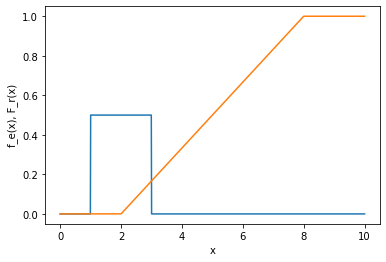

In [1]:
# Start by importing useful packages
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Boundaries of uniform distributions
e_l = 1
e_u = 3
r_l = 2
r_u = 8

# PDF of load effect
def f_e(e):
    if e >= e_l and e <= e_u:
        return 1 / (e_u - e_l)
    else:
        return 0

# CDF of resistance
def F_r(r):
    if r < r_l:
        return 0
    elif r <= r_u:
        return (r - r_l) / (r_u - r_l)
    else:
        return 1

# Values at which we will plot the two functions
x_list = np.linspace(0, 10, 1000)
    
fig, ax = plt.subplots()
plt.plot(x_list, [f_e(x) for x in x_list])
plt.plot(x_list, [F_r(x) for x in x_list])
#ax.set_title("Scatter plot")
ax.set_xlabel("x")
ax.set_ylabel("f_e(x), F_r(x)"); # Semicolon prevents printing output of this (last) statement.




From the chart above we observe that we need to integrate the product of the constant PDF $f_E(e)$ and the linear CDF $F_R(e)$ on interval $e\in(r_l,e_u)$. Outside this interval this product of these two functions is zero.

Therefore
\begin{align}
P_f &= \int_{-\infty}^{\infty}f_E(e)F_R(e)\,de \\
&= \int_{r_l}^{e_u}\frac{1}{e_u-e_l}\frac{e-r_l}{r_u-r_l}\,de \\
&= \frac{1}{e_u-e_l}\frac{1}{r_u-r_l}\int_{r_l}^{e_u}e-r_l\,de \\
&= \frac{1}{e_u-e_l}\frac{1}{r_u-r_l}\left[\frac{e^2}{2}-er_l\right]_{e=r_l}^{e_u} \\
&= \frac{1}{e_u-e_l}\frac{1}{r_u-r_l}\left[\frac{e_u^2}{2}-e_ur_l+\frac{r_l^2}{2}\right] \\
&= \frac{1}{2}\frac{1}{e_u-e_l}\frac{1}{r_u-r_l}\left(e_u-r_l\right)^2 \\
\end{align}

Finally, we substitute the limits and get
\begin{align}
P_f &= \frac{1}{2}\frac{1}{3-1}\frac{1}{8-2}\left(3-2\right)^2 = \frac{1}{24} \approx 0.041666\\
\end{align}

Now check the solution by simulation.

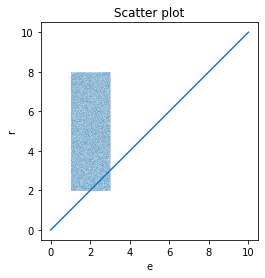

In [2]:
# Generate samples of E and R 
num_samples = 100000
e_samples = scipy.stats.uniform.rvs(size=num_samples,loc=e_l,scale=e_u-e_l)
r_samples = scipy.stats.uniform.rvs(size=num_samples,loc=r_l,scale=r_u-r_l)

fig, ax = plt.subplots()
plt.scatter(e_samples, r_samples, s=0.0001)
plt.plot([0,10], [0,10]) # Graph of function e = r.
plt.axis('scaled')
ax.set_title("Scatter plot")
ax.set_xlabel("e")
ax.set_ylabel("r"); # Semicolon prevents printing output of this (last) statement.

In [3]:
# Now create list of True or False depending on 
# whether the (e, r) pair indicate failing structure, i.e. it is below the $r=e$ line.

result_list = e_samples >= r_samples
print(result_list)

[False False False ... False False False]


In [4]:
# And count the True samples
num_fails = sum(result_list)
print(f"Number of failing samples is {num_fails}.")

Number of failing samples is 4161.


In [5]:
# And finally express probability of failure
# as the number of failing samples over number of all samples.
Pf = num_fails / num_samples
print(f"Probability of failure estimated from simulation is {Pf}.")

Probability of failure estimated from simulation is 0.04161.


## Example 2: normally distributed effect and resistance

Distributions of load effect and resistance are known to be normal with parameters
$$
E \sim \mathcal{N}(\mu_E = 10, \sigma_E = 3) \\
R \sim \mathcal{N}(\mu_R = 20, \sigma_R = 4)
$$

The PDF of normal distribution is

$$
f_X(x)=\frac{1}{\sigma\sqrt{2\pi}} \operatorname{exp}\left(-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right) \\
$$

The CDF of normal distribution is
$$
F_X(x)=\frac{1}{2}\left(1 + \operatorname{erf}\left( \frac{x-\mu}{\sigma\sqrt{2}}\right)\right)
$$
where $\text{erf}()$ is the error function.


In the introductory section we derived
$$
P_f =  \Pr(R - E \le 0) = \int_{-\infty}^{\infty}f_E(e)F_R(e)\,de
$$

Introducing PDF and CDF into above expression we get

$$
P_f = \int_{-\infty}^{\infty}\frac{1}{\sigma_E\sqrt{2\pi}} \operatorname{exp}\left(-\frac{1}{2}\left(\frac{e - \mu_E}{\sigma_E}\right)^2\right)\frac{1}{2}\left(1 + \operatorname{erf}\left( \frac{e-\mu_R}{\sigma_R\sqrt{2}}\right)\right)\,de
$$

and substituting the parameter values we obtain

$$
P_f = \int_{-\infty}^{\infty}\frac{1}{3\sqrt{2\pi}} \operatorname{exp}\left(-\frac{1}{2}\left(\frac{e - 10}{3}\right)^2\right)\frac{1}{2}\left(1 + \operatorname{erf}\left( \frac{e-20}{4\sqrt{2}}\right)\right)\,de
$$

Writing this definite integral in Wolfram Alpha syntax we get following code

```
integral (1/3/sqrt(2*pi)*exp(-1/2*(x-10)^2/3^2))*(1/2*(1+erf((x-20)/4/sqrt(2)))) from -infinity to infinity
```

To evaluate this definite integral we paste this code into Wolfram Alpha input bar an we get

https://www.wolframalpha.com/input/?i=integral+%281%2F3%2Fsqrt%282*pi%29*exp%28-1%2F2*%28x-10%29%5E2%2F3%5E2%29%29*%281%2F2*%281%2Berf%28%28x-20%29%2F4%2Fsqrt%282%29%29%29%29+from+-infinity+to+infinity

which means that the probability of failure

$$
P_f = 0.0227501 \approx 2.275\%
$$

Now check the solution by simulation.

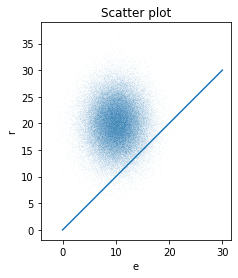

In [6]:
# Start by importing useful packages
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generate samples of E and R 
num_samples = 100000
e_samples = scipy.stats.norm.rvs(size=num_samples,loc=10,scale=3)
r_samples = scipy.stats.norm.rvs(size=num_samples,loc=20,scale=4)

fig, ax = plt.subplots()
plt.scatter(e_samples, r_samples, s=0.0001)
plt.plot([0,30], [0,30]) # Graph of function e = r.
plt.axis('scaled')
ax.set_title("Scatter plot")
ax.set_xlabel("e")
ax.set_ylabel("r"); # Semicolon prevents printing output of this (last) statement.

In [7]:
# Now create list of True or False depending on 
# whether the (e, r) pair indicate failing structure, i.e. it is below the $r=e$ line.

result_list = e_samples >= r_samples
print(result_list)

[False False False ... False False False]


In [8]:
# And count the True samples
num_fails = sum(result_list)
print(f"Number of failing samples is {num_fails}.")

Number of failing samples is 2247.


In [9]:
# And finally express probability of failure
# as the number of failing samples over number of all samples.
Pf = num_fails / num_samples
print(f"Probability of failure estimated from simulation is {Pf}.")

Probability of failure estimated from simulation is 0.02247.
